## Assessing the Efficacy of Three-Child Policy & Predicting China Population

Wenjun Rao (71672380) & Rachel Yang (57893471)


### Introduction

First, we start by importing the Python packages that contain all necessary functions for our analysis.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from sklearn.model_selection import train_test_split

%matplotlib inline

### Dataset

In [2]:
# Load the data from my github
url = "https://raw.githubusercontent.com/yarach71/Econ-323-Final-Project/main/Econ323_Data.csv"
pop_raw = pd.read_csv(url)
pop_raw

,Year,Region,Total Population\n(year-end)\n(10 000 persons),Urban Population,Urban Population Proportion (%),Rural Population,Rural Population Proportion (%),Birth Rate\n(‰),Death Rate\n(‰),Natural\nGrowth Rate\n(‰),Sex Ratio\n(Female=100),Never\nMarried (%)above 15 years old,Children\nDependency\nRatio,Dependency\nRatio,Percentage\nof Illiterate\nPopulation to\nTotal Aged 15\nand Over(%),Gross\nRegional\nProduct (100 million yuan),Unemployment (10 000 persons),CPI (Last year = 100）
0,2022,Beijing,2184.0,1913.0,87.57,271.0,12.43,5.67,5.72,-0.05,104.18,21.06,16.57,20.76,0.84,41610.90,36.4,101.8
1,2022,Tianjin,1363.0,1160.0,85.11,203.0,14.89,4.75,6.43,-1.68,105.01,18.46,18.51,24.28,1.65,16311.30,25.4,101.9
2,2022,Hebei,7420.0,4575.0,61.65,2845.0,38.35,6.09,7.80,-1.71,98.77,16.54,28.22,23.77,2.18,42370.40,20.5,101.8
3,2022,Shanxi,3481.0,2226.0,63.96,1255.0,36.04,6.75,7.73,-0.98,104.37,18.70,21.99,20.66,1.73,25642.60,19.9,102.1
4,2022,Inner Mongolia,2401.0,1647.0,68.60,754.0,31.40,5.58,7.83,-2.25,104.11,15.75,18.45,20.40,3.75,23158.60,29.0,101.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2016,Shaanxi,3813.0,2110.0,55.34,1703.0,44.66,10.64,6.23,4.41,101.93,21.45,19.93,14.43,5.22,19399.59,22.7,101.3
213,2016,Gansu,2610.0,1166.0,44.69,1444.0,55.31,12.18,6.18,6.00,102.85,20.84,23.21,13.62,8.70,7200.37,9.8,101.3
214,2016,Qinghai,593.0,306.0,51.63,287.0,48.37,14.70,6.18,8.52,105.80,21.38,26.98,9.89,13.45,2572.49,4.6,101.8
215,2016,Ningxia,675.0,380.0,56.29,295.0,43.71,13.69,4.72,8.97,106.70,19.41,26.20,10.65,6.82,3168.59,5.1,101.5


In [3]:
# Cleaning and renaming the columns

# Simplify column names
new_column_names = {
    "Total Population\n(year-end)\n(10 000 persons)": "total_pop",
    "Urban Population": "urban_pop",
    "Urban Population Proportion (%)": "urban_proportion",
    "Rural Population": "rural_pop",
    "Rural Population Proportion (%)": "rural_proportion",
    "Birth Rate\n(‰)": "birth",
    "Death Rate\n(‰)": "death",
    "Natural\nGrowth Rate\n(‰)": "natural_growth",
    "Sex Ratio\n(Female=100)": "sex_ratio",
    "Never\nMarried (%)above 15 years old": "never_married",
    "Children\nDependency\nRatio": "dependency_young",
    "Dependency\nRatio": "dependency_old",
    "Percentage\nof Illiterate\nPopulation to\nTotal Aged 15\nand Over(%)": "Illiteracy",
    "Gross\nRegional\nProduct (100 million yuan)": "GRP",
    "Unemployment (10 000 persons)": "unemployment",
    "CPI (Last year = 100）": "CPI"
}

pop_raw.rename(columns=new_column_names, inplace=True)

# Check for missing values
missing_values = pop_raw.isnull().sum()

# Check data types
data_types = pop_raw.dtypes

missing_values, data_types

(Year                0
 Region              0
 total_pop           0
 urban_pop           0
 urban_proportion    0
 rural_pop           0
 rural_proportion    0
 birth               0
 death               0
 natural_growth      0
 sex_ratio           0
 never_married       0
 dependency_young    0
 dependency_old      0
 Illiteracy          0
 GRP                 0
 unemployment        0
 CPI                 0
 dtype: int64,
 Year                  int64
 Region               object
 total_pop           float64
 urban_pop           float64
 urban_proportion    float64
 rural_pop           float64
 rural_proportion    float64
 birth               float64
 death               float64
 natural_growth      float64
 sex_ratio           float64
 never_married       float64
 dependency_young    float64
 dependency_old      float64
 Illiteracy          float64
 GRP                 float64
 unemployment        float64
 CPI                 float64
 dtype: object)

In [4]:
# Rename the dataframe
pop = pop_raw.copy()
# Check the shape of the dataframe
print(pop.shape)

(217, 18)


In [5]:
# Create a dummy variable 'policy'
pop['Policy'] = pop_raw['Year'].apply(lambda x: 1 if x in [2022, 2021] else 0)

# Check the shape of the new dataframe
print(pop.shape)
# Display the first few rows to confirm the addition of the dummy variable
pop.head()

(217, 19)


,Year,Region,total_pop,urban_pop,urban_proportion,rural_pop,rural_proportion,birth,death,natural_growth,sex_ratio,never_married,dependency_young,dependency_old,Illiteracy,GRP,unemployment,CPI,Policy
0,2022,Beijing,2184.0,1913.0,87.57,271.0,12.43,5.67,5.72,-0.05,104.18,21.06,16.57,20.76,0.84,41610.9,36.4,101.8,1
1,2022,Tianjin,1363.0,1160.0,85.11,203.0,14.89,4.75,6.43,-1.68,105.01,18.46,18.51,24.28,1.65,16311.3,25.4,101.9,1
2,2022,Hebei,7420.0,4575.0,61.65,2845.0,38.35,6.09,7.80,-1.71,98.77,16.54,28.22,23.77,2.18,42370.4,20.5,101.8,1
3,2022,Shanxi,3481.0,2226.0,63.96,1255.0,36.04,6.75,7.73,-0.98,104.37,18.70,21.99,20.66,1.73,25642.6,19.9,102.1,1
4,2022,Inner Mongolia,2401.0,1647.0,68.60,754.0,31.40,5.58,7.83,-2.25,104.11,15.75,18.45,20.40,3.75,23158.6,29.0,101.8,1


In [6]:
# Descriptive Statistics
summary = pop.describe()
print(summary)

              Year     total_pop    urban_pop  urban_proportion    rural_pop  \
count   217.000000    217.000000   217.000000        217.000000   217.000000   
mean   2019.000000   4515.524839  2785.843917         61.557419  1729.671659   
std       2.004624   2915.195216  1880.283353         11.636978  1185.086684   
min    2016.000000    331.000000    98.000000         29.560000   203.000000   
25%    2017.000000   2475.000000  1542.000000         54.690000   899.440000   
50%    2019.000000   3874.000000  2280.000000         60.150000  1505.000000   
75%    2021.000000   6255.000000  3747.000000         67.490000  2482.000000   
max    2022.000000  12684.000000  9466.000000         89.330000  4909.000000   

       rural_proportion       birth       death  natural_growth   sex_ratio  \
count        217.000000  217.000000  217.000000      217.000000  217.000000   
mean          38.442995    9.860691    6.353410        3.507327  104.723180   
std           11.636754    3.192716    1.1

### Explore and summarize Visualization

Use box plots to summary key variables

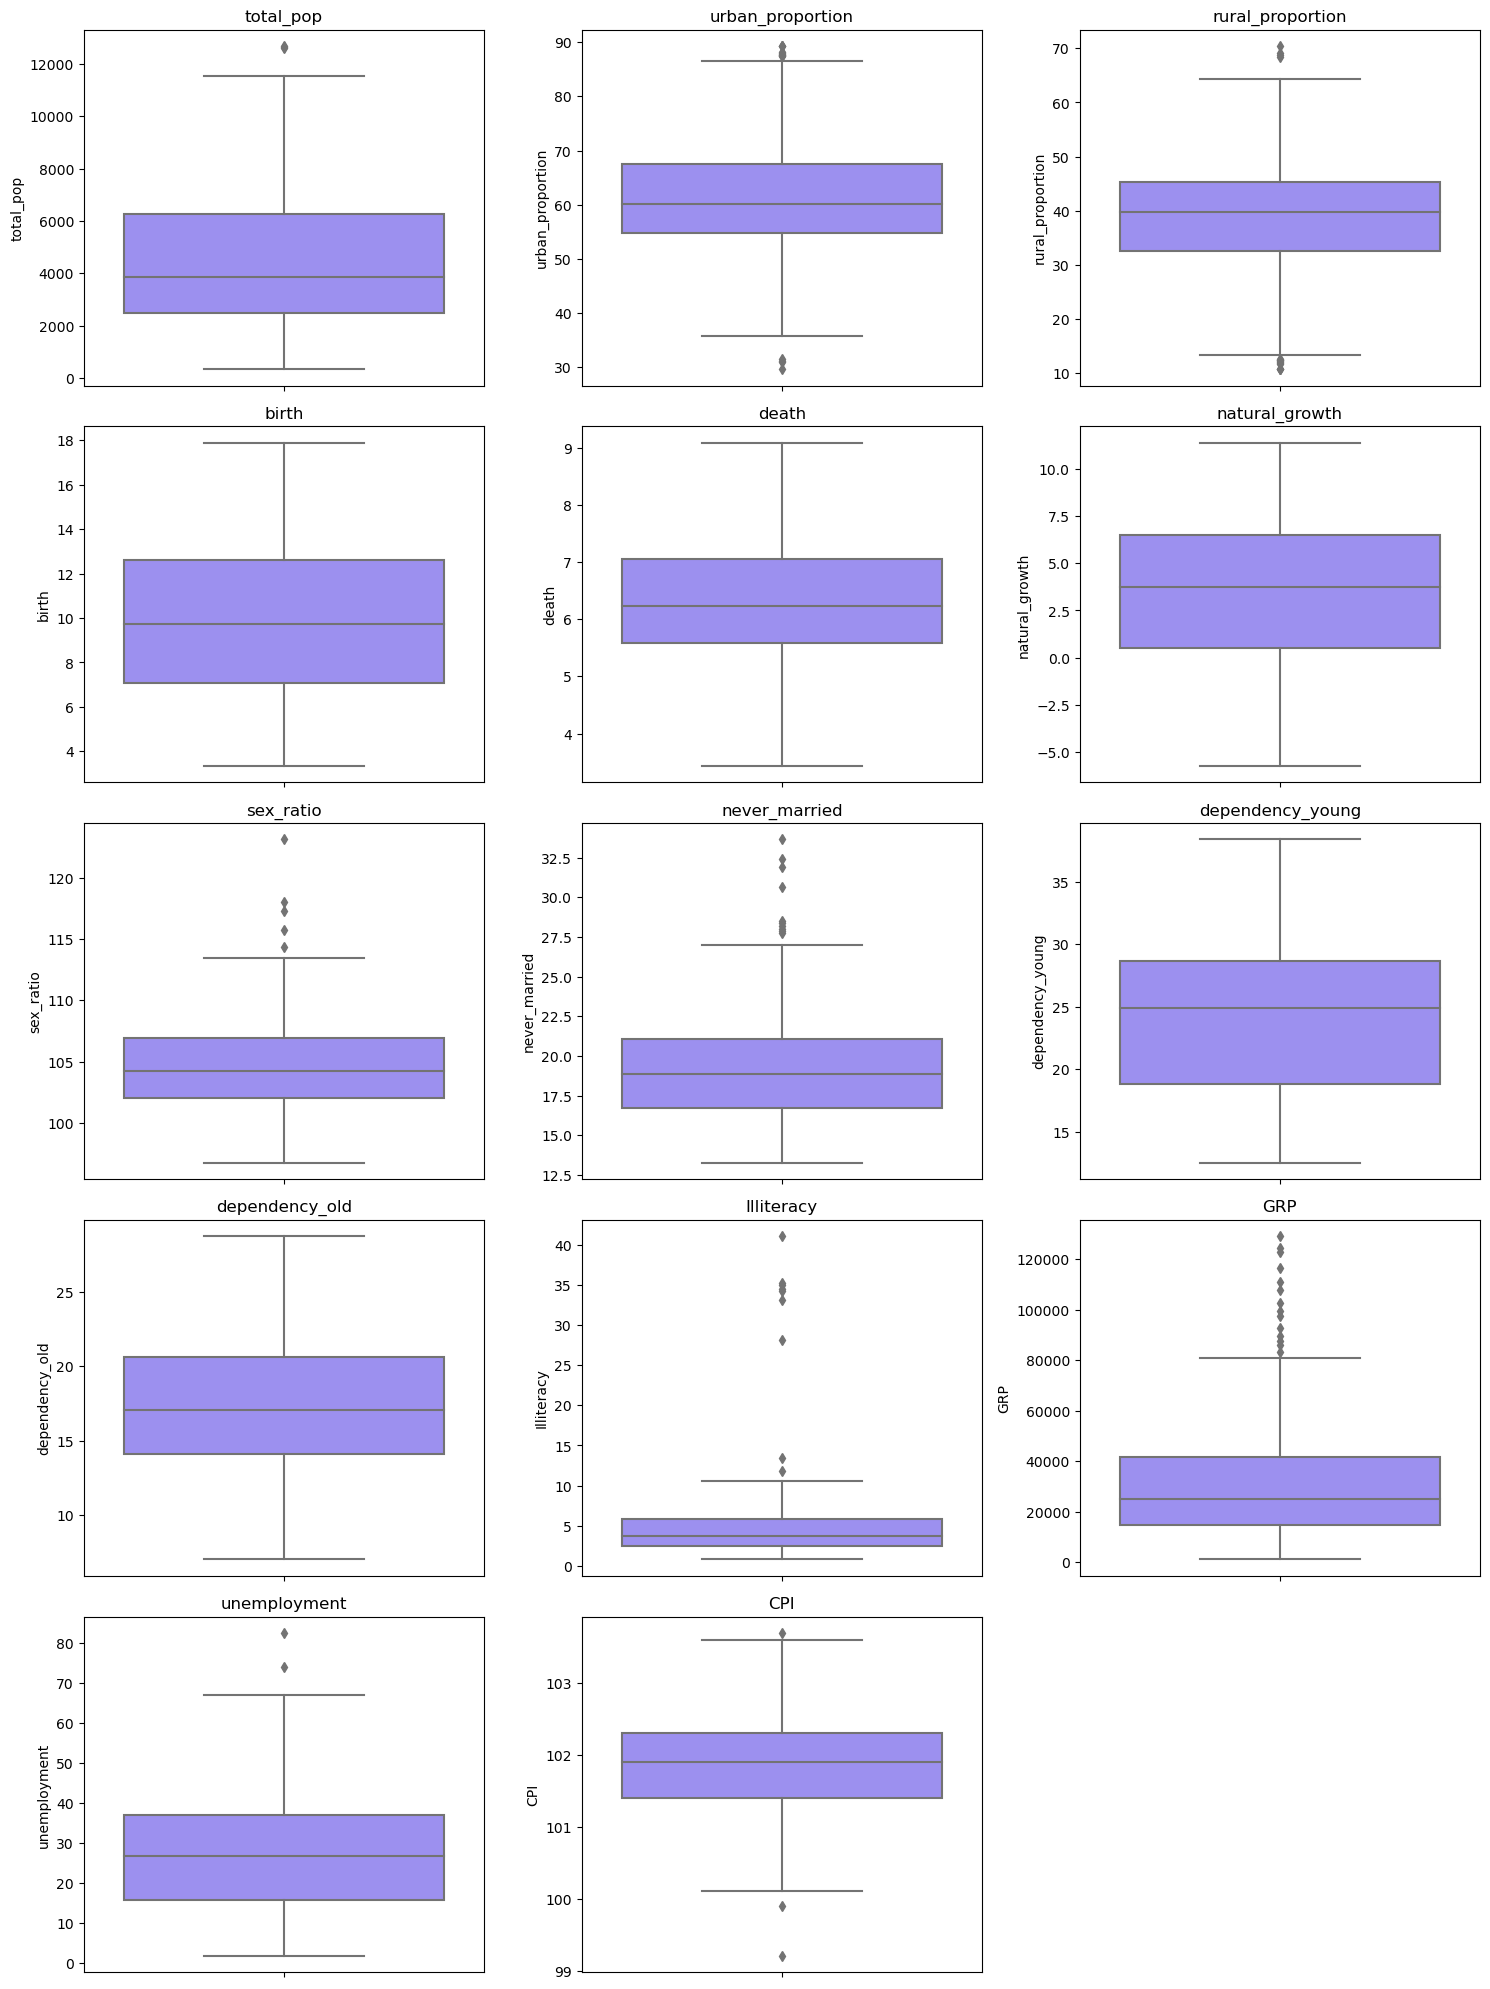

In [7]:
# Excluding 'Urban Population', 'Rural Population', 'Policy', and 'Year' for the box plots
exclude = ['urban_pop', 'rural_pop', 'Policy', 'Year', 'Region']
columns_include = pop.columns.drop(exclude)

# Determine the number of rows required for the subplot grid
num_columns = len(columns_include)
num_rows = (num_columns // 3) + (num_columns % 3 > 0)

# Create a subplot grid and plot box plots for the selected numeric columns
plt.figure(figsize=(15, num_rows * 4))

for i, column in enumerate(columns_include, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=pop[column], color='#9080ff') 
    plt.title(column)

plt.tight_layout()
plt.show()

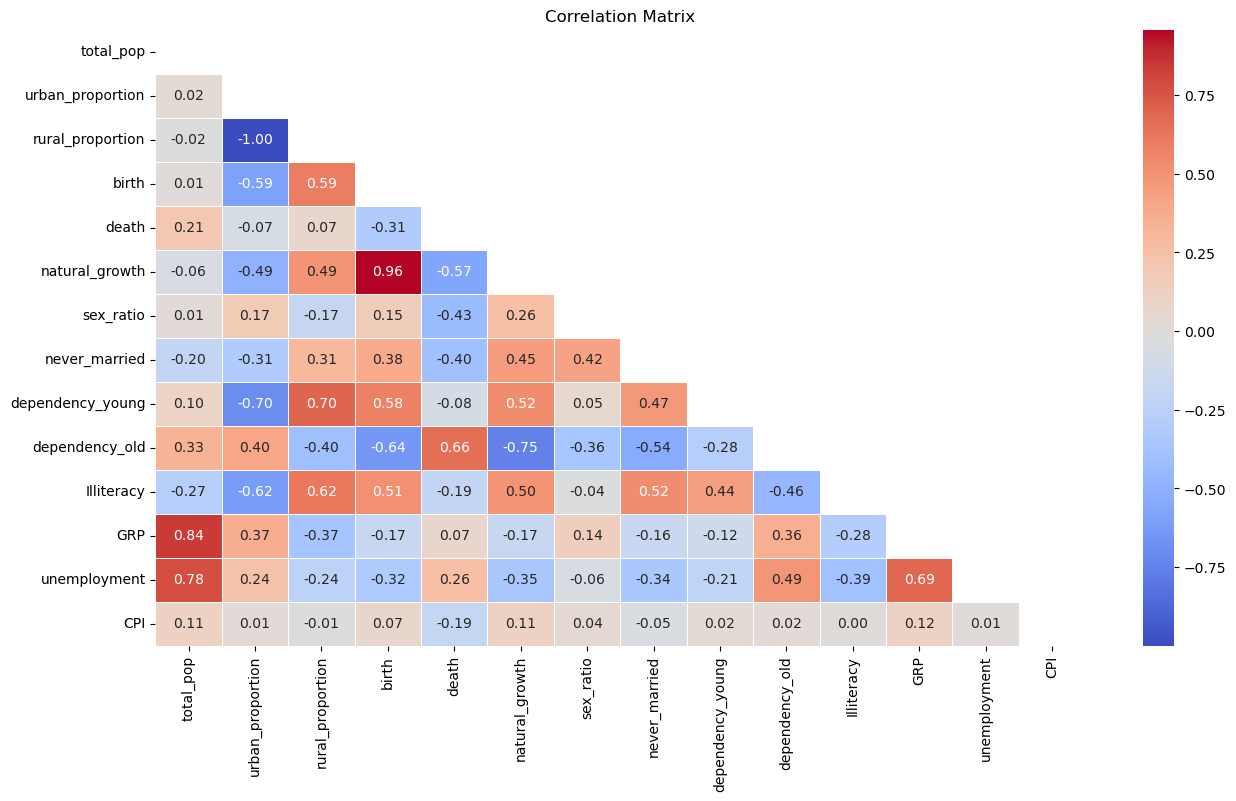

In [8]:
# Heatmap of the correlation matrix
correlation_matrix = pop[columns_include].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creating the heatmap with the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

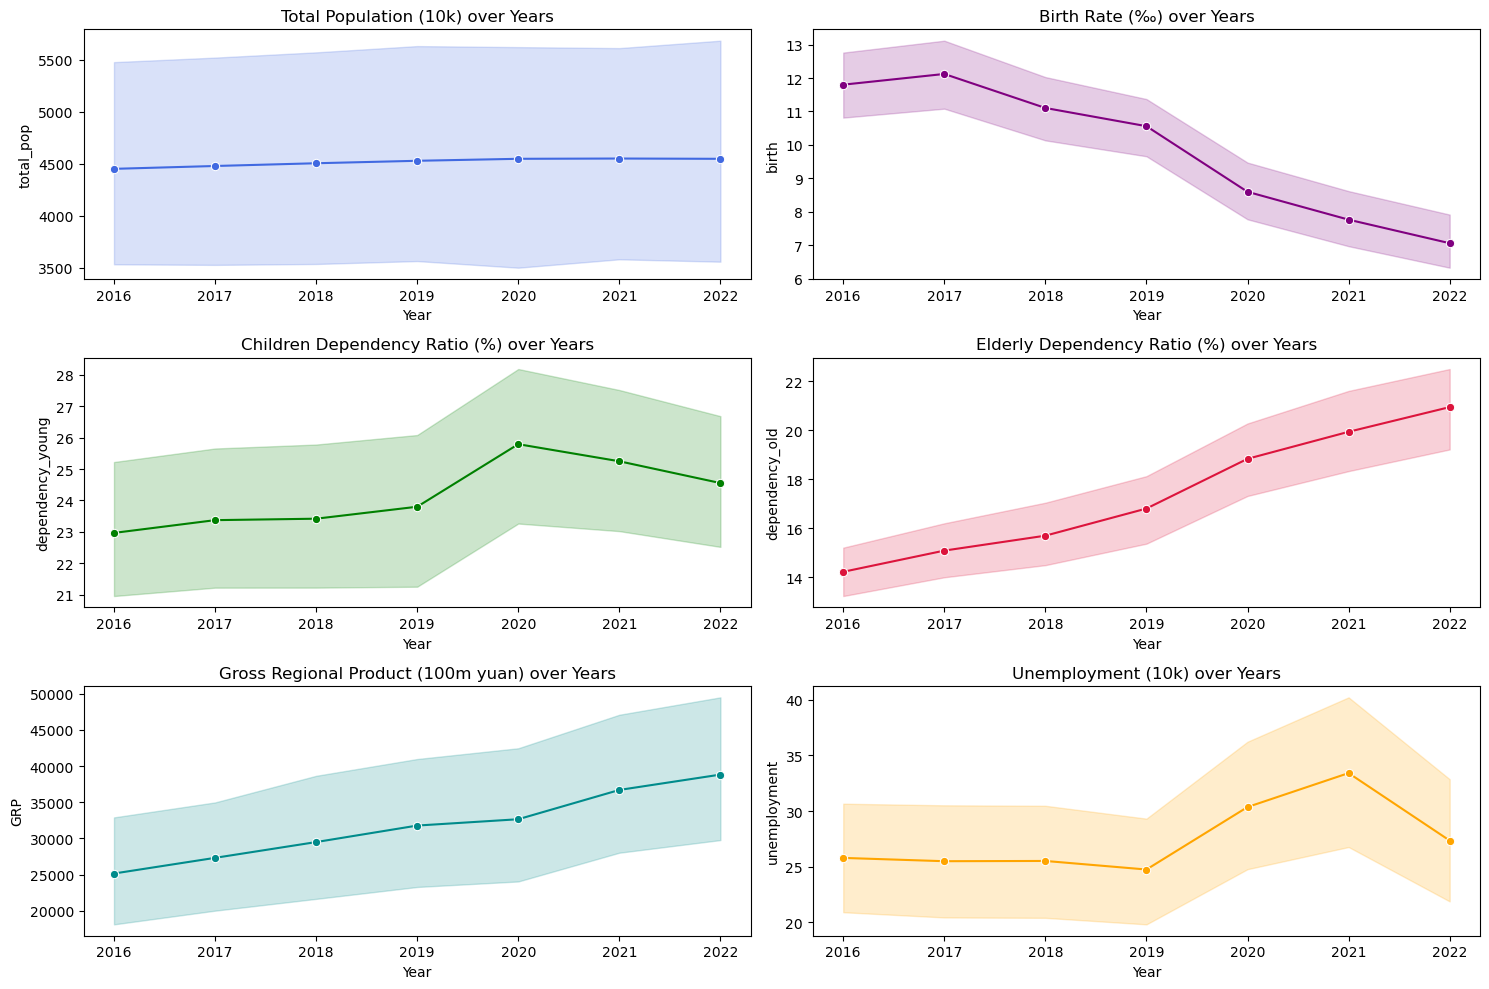

In [15]:
# Plotting the trends of the 
plt.figure(figsize=(15, 10))

# Total Population
plt.subplot(3, 2, 1)
sns.lineplot(x='Year', y='total_pop', data=pop, marker='o', color='royalblue')
plt.title('Total Population (10k) over Years')

# Birth Rate
plt.subplot(3, 2, 2)
sns.lineplot(x='Year', y='birth', data=pop, marker='o', color='purple')
plt.title('Birth Rate (‰) over Years')

# Children Dependency Ratio
plt.subplot(3, 2, 3)
sns.lineplot(x='Year', y='dependency_young', data=pop, marker='o', color='green')
plt.title('Children Dependency Ratio (%) over Years')

# Elderly Dependency Ratio
plt.subplot(3, 2, 4)
sns.lineplot(x='Year', y='dependency_old', data=pop, marker='o', color='crimson')
plt.title('Elderly Dependency Ratio (%) over Years')

# GRP
plt.subplot(3, 2, 5)
sns.lineplot(x='Year', y='GRP', data=pop, marker='o', color='darkcyan')
plt.title('Gross Regional Product (100m yuan) over Years')

# Unemployment
plt.subplot(3, 2, 6)
sns.lineplot(x='Year', y='unemployment', data=pop, marker='o', color='orange')
plt.title('Unemployment (10k) over Years')

plt.tight_layout()
plt.show()

In [40]:
# Load the shapefile
china_shapefile = gpd.read_file('Econ323_final_Project/Econ-')

# Assuming 'pop' is your DataFrame with the regions and data you want to plot
# The DataFrame needs a column with region names that exactly match those in the shapefile
merged = china_shapefile.merge(pop, left_on='region_name_in_shapefile', right_on='Region')

# Create a choropleth map
fig, ax = plt.subplots(1, 1)
merged.plot(column='YourDataColumn', ax=ax, legend=True)
plt.show()

DriverError: CHN_adm0.shp: No such file or directory

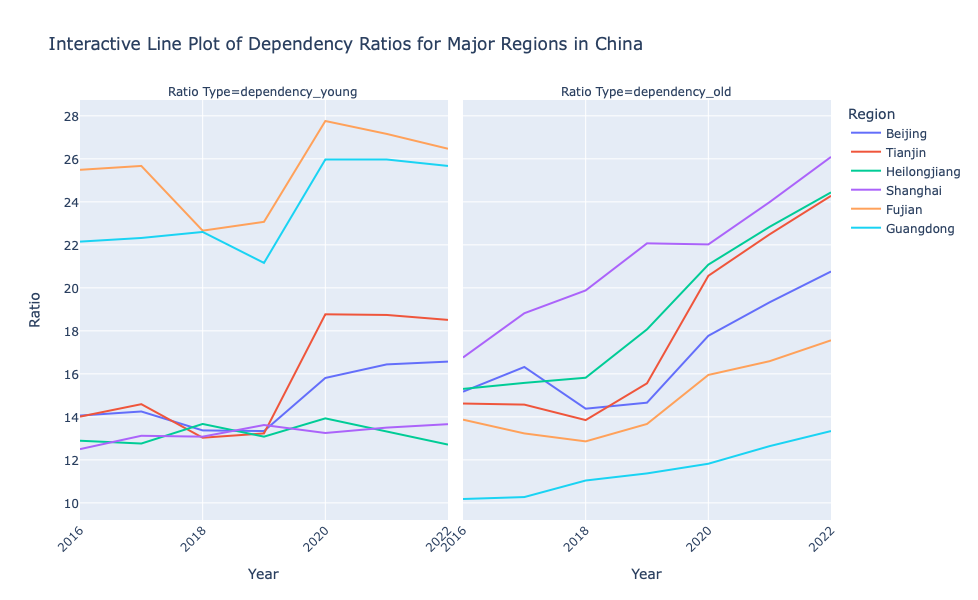

In [27]:
# Interactive Line Plot for major regions
selected_regions = ['Beijing', 'Shanghai', 'Guangdong', 'Heilongjiang', 'Tianjin', 'Fujian']
filtered_pop = melted_pop[melted_pop['Region'].isin(selected_regions)]

# Create the interactive line plot
fig = px.line(filtered_pop, x="Year", y="Ratio", color='Region', line_group='Region',
              facet_col='Ratio Type', facet_col_wrap=2, 
              title='Interactive Line Plot of Dependency Ratios for Major Regions in China')

# Update layout
fig.update_layout(
    width=1000,
    height=600, 
    hovermode='x',
)

for axis in fig.layout:
    if axis.startswith('xaxis'):
        fig.layout[axis].update(tickangle=-45)

# Show the figure
fig.show()

### Modelling

### Linear Regression

Since our analysis focuses on the impact of the Three-Child Policy, which is implemented in 2021, we split the date chronologically, that is, using data up to the year 2020 for training and the rest for testing. This ensures that the training data doesn't include the post-policy period. This way, the model learns the pattern without the influence of the policy, and its performance and predictions can be evaluated based on how well it adapts to the post-policy data.

In [ ]:
# Split the data chronologically 

# Preparing the data
X = regression_data[['Year', 'PolicyDummy']]
y = regression_data['Children Dependency Ratio']

# Splitting the data chronologically
# Using data up to the year 2020 for training and the rest for testing
train_data = regression_data[regression_data['Year'] <= 2020]
test_data = regression_data[regression_data['Year'] > 2020]

X_train = train_data[['Year', 'PolicyDummy']]
y_train = train_data['Children Dependency Ratio']
X_test = test_data[['Year', 'PolicyDummy']]
y_test = test_data['Children Dependency Ratio']

# The train and test sets are now ready for machine learning model development